<a href="https://colab.research.google.com/github/tjsgn616/google_drive/blob/main/Chapter_5_1_%EB%B0%95%EC%84%A0%ED%9B%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# 데이터 불러오기
- 와인 데이터
  + alcohol, sugar, pH, class
  + 클래스 0 = 레드와인, 클래스 1 = 화이트 와인

# 로지스틱 회귀로 와인 분류하기

In [1]:
import pandas as pd
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [2]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


- info()
  + 결측치 확인, 변수 타입 확인

In [3]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [4]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


## 표준화 작업

In [5]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine[['class']].to_numpy()

## 훈련 데이터와 테스트 데이터로 분리

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42 #test_size : 테스트 데이터와 훈련데이터를 나누는 비율(테스트 데이터를 20퍼센트 만큼만 한다는 뜻)
)
print(train_input.shape, test_input.shape) # 같은 형태인지 확인

(5197, 3) (1300, 3)


In [7]:
from sklearn.preprocessing import StandardScaler # 표준화 진행
ss = StandardScaler()
ss.fit(train_input)
train_scaled= ss.transform(train_input)
test_scaled = ss.transform(test_input)

# 모델 만들기

## 로지스틱 회귀

In [8]:
from sklearn.linear_model import LogisticRegression # 로지스틱 회귀 모델로 훈련
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
print(lr.coef_, lr.intercept_) # 로지스틱 회귀가 학습한 계수와 절편

[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


## 결정 트리 모델(sklearn 의 DecisionTreeClassifier)

- 데이터를 잘 나눌 수 있는 질문을 찾아 끊임 없이 질문을 던지는 형식의 모델
  + 의사 결정 트리의 기본 알고리즘을 활용해서, 대형 회사들이 신규 알고리즘을 만들어 내고 있다.(XGBoost, LightGBM, CatBoost 등등)
  + 현재 실무에서 가장 많이 쓰이는 것은 LightGBM 모델
- 높은 정확도
- 훈련 데이터에 대해서 과적합이 발생 할 수 있음
- 로지스틱 회귀는 수식형태로 나와서 숫자에 민감하지만 결정 트리 모델은 덜하다.

<br>

- DecisionTreeClassifier 클래스 사용,
- fit() 메서드를 호출해 모델 훈련, score() 메서드로 정확도 평가

In [10]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target)) # 훈련 데이터 점수에 비해
print(dt.score(test_scaled, test_target)) # 테스트 점수가 낮음 => 과적합 모델

0.996921300750433
0.8592307692307692


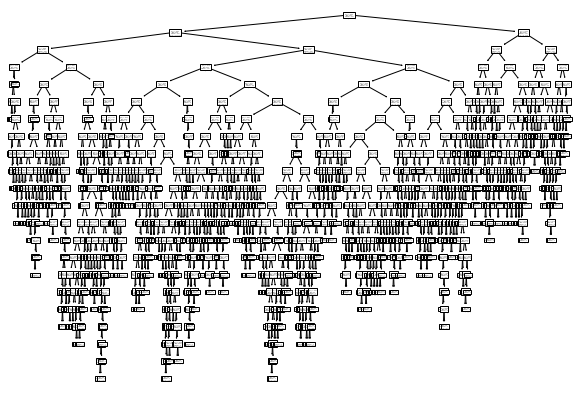

In [11]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree # plot_tree() 는 결정트리를 이해하기 쉬운 트리 그림으로 표현 해줌
plt.figure(figsize = (10,7)) #fig size = 그래프 크기
plot_tree(dt)
plt.show()

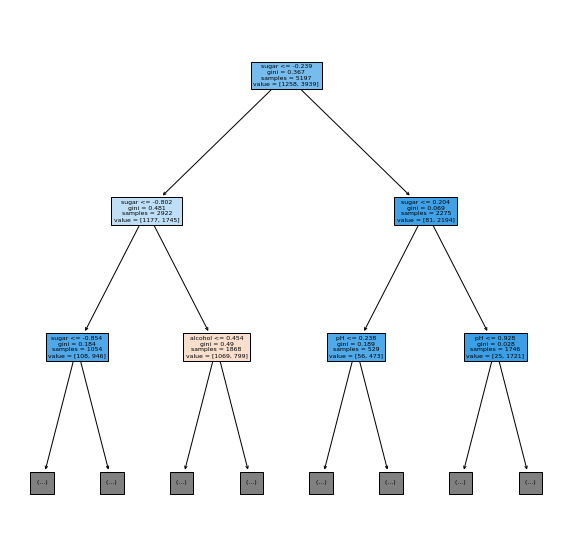

In [12]:
plt.figure(figsize=(10,10))
plot_tree(dt, max_depth=2, filled=True, feature_names=['alcohol', 'sugar', 'pH']) # max_depth : 뻗어나가는 갯수 제한, filled=True 색깔 다르게 칠하기
plt.show()

# 가지치기
- 과대적합을 방지하기 위한 것

In [13]:
dt = DecisionTreeClassifier(max_depth = 3 , random_state = 42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled,test_target)) 

0.8454877814123533
0.8415384615384616


- 훈련 데이터 점수가 낮아지긴했지만. 둘의 점수가 비슷해졌다.

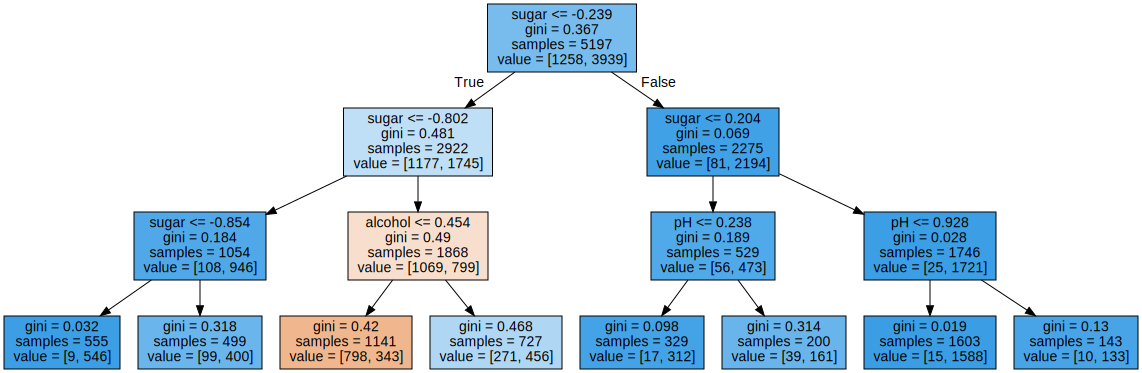

In [15]:
import graphviz
from sklearn import tree

# DOT data
dot_data = tree.export_graphviz(dt, out_file= None,
                                feature_names = ['alcohol', 'sugar', 'pH'],
                                filled = True)

# Draw graph
graph = graphviz.Source(dot_data, format = "png")
graph

In [16]:
graph.render("decision_tree_graphviz")

'decision_tree_graphviz.png'

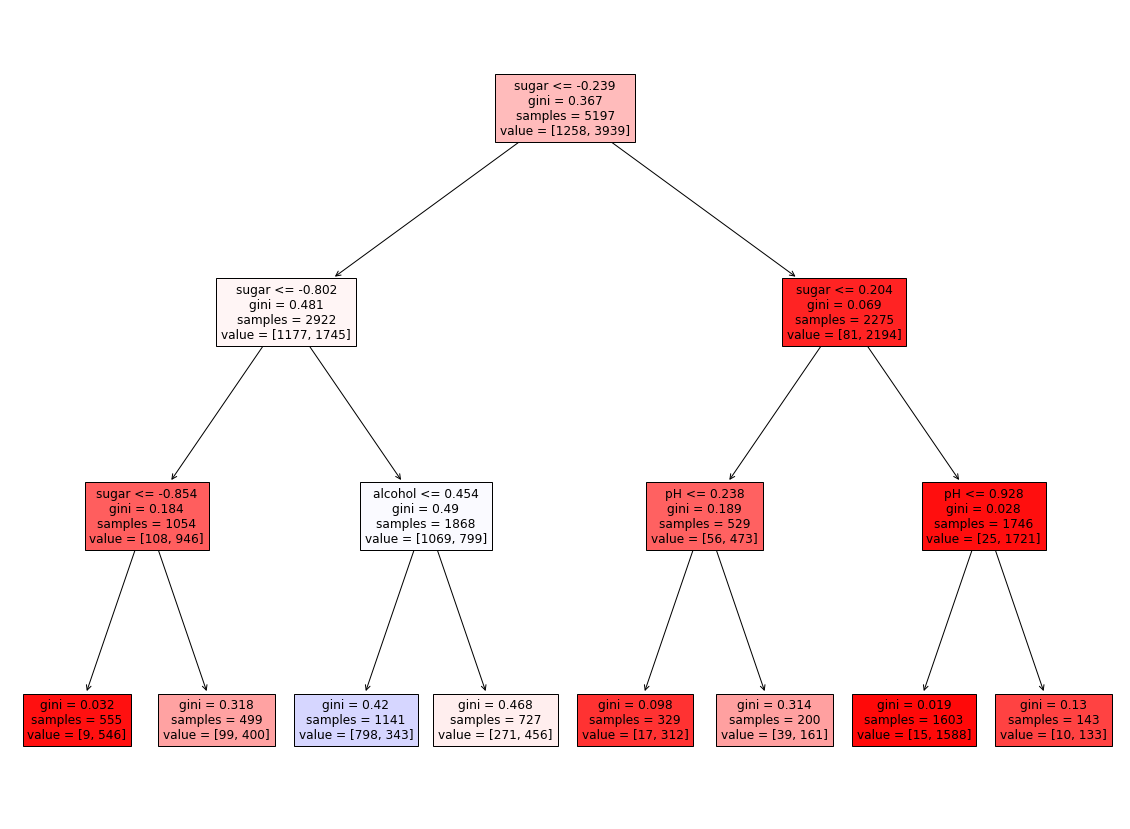

In [17]:
from matplotlib.colors import ListedColormap, to_rgb
import numpy as np

plt.figure(figsize=(20,15))
artists = plot_tree(dt, filled = True,
                    feature_names = ['alcohol', 'sugar', 'pH'])

colors = ['blue', 'red']
for artist, impurity, value in zip(artists, dt.tree_.impurity, dt.tree_.value):
  r,g,b = to_rgb(colors[np.argmax(value)])
  f = impurity *2
  artist.get_bbox_patch().set_facecolor((f + (1-f)*r, f+(1-f)*g, f+ (1-f)*b))
  artist.get_bbox_patch().set_edgecolor('black')

plt.show()